In [26]:
import pandas as pd
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [27]:
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

In [28]:
from algorithm.kgvec2go_vectors_simple import run_method

In [4]:
from algorithm.kgvec2go_vectors_simple import run_method, load_gensim_model
from excludes.basic_excludes import (node_excl_yago_func, node_excl_extra,
                                     node_excl_owlthing_func, node_excl_wiki_func)
from loaders.loaders import *
from evaluation.split_dataset import split_on_seed_dataset
import json
import pickle
import os
from tqdm import tqdm


exclude_paths = [
    ["", "http://www.w3.org/1999/02/22-rdf-syntax-ns#type", "http://www.w3.org/2004/02/skos/core#Concept"]
]
relation_excludes = ["http://xmlns.com/foaf/0.1/primaryTopic",
                     "http://dbpedia.org/property/isCitedBy",
                     "http://dbpedia.org/ontology/wikiPageWikiLink",
                     "http://dbpedia.org/ontology/wikiPageWikiLinkText",
                     "http://dbpedia.org/property/wikiPageUsesTemplate",
                     'http://dbpedia.org/ontology/wikiPageRedirects',
                     'http://dbpedia.org/ontology/wikiPageOutDegree',
                     "http://dbpedia.org/ontology/abstract",
                     "http://www.w3.org/2000/01/rdf-schema#comment", ]

res_excludes_inside_point_relation = ["http://purl.org/linguistics/gold/hypernym",
                                      "http://www.w3.org/1999/02/22-rdf-syntax-ns#type"]
res_excludes_inside_point_node = []
node_excludes_funcs = [node_excl_wiki_func, node_excl_owlthing_func, node_excl_yago_func, node_excl_extra]

SEED = 44
SAMPLE_SIZE = 4
verbose = 1

#Dataset load
#lc_quad_train = load_lc_quad_train()

lc_quad_train = load_on_path(ds_lc_quad_train_cleaned)
splitted_lcquad = split_on_seed_dataset(lc_quad_train, SAMPLE_SIZE, SEED)

#splitted_lcquad = load_on_path_pickle("/home/kardosp/continuethelist/outputs/graphwalk_v2_output_sample4.pickle")

cwd = "/home/kardosp/continuethelist/dbpedia_vectors/kgvec2go"
word2vec_path = os.path.join(cwd, 'model.kv')
wv_model = load_gensim_model(word2vec_path)



In [5]:
missing_counter = 0
# lcquad_output = run_on_dataset(splitted_lcquad, exclude_paths, relation_excludes, node_excludes_funcs)
for i, record in tqdm(enumerate(splitted_lcquad)):
    print(i)
    if "output" in record:
        continue
    result, missing = run_method(record["seed"], wv_model)
    record["output"] = result
    missing_counter += missing
    # TODO - evaluate

    with open("/home/kardosp/continuethelist/outputs/kgvec2go_v1_output_sample4.pickle", "wb") as f:
        pickle.dump(splitted_lcquad, f)


0it [00:00, ?it/s]


0


AxisError: axis 0 is out of bounds for array of dimension 0

In [7]:
import numpy as np
from scipy.spatial.distance import cdist

# lcquad_output = run_on_dataset(splitted_lcquad, exclude_paths, relation_excludes, node_excludes_funcs)
for i, record in tqdm(enumerate(splitted_lcquad)):
    print(i)
    seed = record["seed"]
    vectors = dict()
    for item in seed:
        try:
            vectors[item] = list(wv_model[item])
        except Exception as e:
            pass
    center_vector = np.mean(list(vectors.values()), axis=0)
    #radius = get_radius(center_vector, list(vectors.values()))
    point_dist = cdist([center_vector], list(vectors.values()), metric="euclidean")
    threshold = np.max(point_dist)
    eps = 1e-5
    all_euclidean_dist = cdist([center_vector], wv_model.vectors, metric="euclidean")
    closer_elements = list()
    for index in all_euclidean_dist.argsort()[0]:
        if all_euclidean_dist[0][index] > threshold+eps:
            break
        closer_elements.append((index, all_euclidean_dist[0][index]))
    prediction = [wv_model.index_to_key[item[0]] for item in closer_elements]

0it [00:00, ?it/s]

0


1it [00:26, 26.18s/it]

1


2it [00:54, 27.69s/it]

2


3it [01:07, 22.61s/it]

3


KeyError: "Key 'http://dbpedia.org/resource/Starr_(rapper)' not present"

In [7]:
import numpy as np
from scipy.spatial.distance import cdist

record = splitted_lcquad[130]
seed = record["seed"]
vectors = dict()
missing = 0
for item in seed:
    try:
        vectors[item] = list(wv_model[item])
    except Exception as e:
        missing += 1
center_vector = np.mean(list(vectors.values()), axis=0)
#radius = get_radius(center_vector, list(vectors.values()))
point_dist = cdist([center_vector], list(vectors.values()), metric="euclidean")
threshold = np.max(point_dist)
eps = 1e-5
all_euclidean_dist = cdist([center_vector], wv_model.vectors, metric="euclidean")
closer_elements = list()
for index in all_euclidean_dist.argsort()[0]:
    if all_euclidean_dist[0][index] > threshold+eps:
        break
    closer_elements.append((index, all_euclidean_dist[0][index]))
prediction = [wv_model.index_to_key[item[0]] for item in closer_elements]

print(missing)

ValueError: XA must be a 2-dimensional array.

In [8]:
missing

4

In [76]:
from loaders.loaders import load_on_path, ds_lc_quad_train_cleaned, ds_lc_quad_test_cleaned
from evaluation.split_dataset import split_on_seed_dataset
from excludes.basic_excludes import node_excl_wiki_func, node_excl_owlthing_func, node_excl_yago_func, node_excl_extra
from algorithm.kgvec2go_vectors_simple import load_gensim_model, run_method, get_radius, cdist, is_inside_ellipse
import json
from gensim import models
from gensim.models import Word2Vec
import os

cwd = "/home/kardosp/continuethelist/dbpedia_vectors/kgvec2go"
word2vec_path = os.path.join(cwd, 'model.kv')

exclude_paths = [
    ["", "http://www.w3.org/1999/02/22-rdf-syntax-ns#type", "http://www.w3.org/2004/02/skos/core#Concept"]
]
relation_excludes = ["http://xmlns.com/foaf/0.1/primaryTopic",
                     "http://dbpedia.org/property/isCitedBy",
                     "http://dbpedia.org/ontology/wikiPageWikiLink",
                     "http://dbpedia.org/ontology/wikiPageWikiLinkText",
                     "http://dbpedia.org/property/wikiPageUsesTemplate",
                     "http://dbpedia.org/ontology/abstract",
                     "http://www.w3.org/2000/01/rdf-schema#comment", ]

res_excludes_inside_point_relation = ["http://purl.org/linguistics/gold/hypernym",
                                      "http://www.w3.org/1999/02/22-rdf-syntax-ns#type"]
res_excludes_inside_point_node = []
node_excludes_funcs = [node_excl_wiki_func, node_excl_owlthing_func, node_excl_yago_func, node_excl_extra]

SEED = 43
SAMPLE_SIZE = 4

#Dataset load
lc_quad_train = load_on_path(ds_lc_quad_train_cleaned)

splitted_lcquad = split_on_seed_dataset(lc_quad_train, SAMPLE_SIZE, SEED)

word2vec_model = load_gensim_model(word2vec_path)

In [4]:
from algorithm.kgvec2go_vectors_simple import run_method, load_gensim_model
from excludes.basic_excludes import (node_excl_yago_func, node_excl_extra,
                                     node_excl_owlthing_func, node_excl_wiki_func)
from loaders.loaders import *
from evaluation.split_dataset import split_on_seed_dataset
import json
import pickle
import os
from tqdm import tqdm


exclude_paths = [
    ["", "http://www.w3.org/1999/02/22-rdf-syntax-ns#type", "http://www.w3.org/2004/02/skos/core#Concept"]
]
relation_excludes = ["http://xmlns.com/foaf/0.1/primaryTopic",
                     "http://dbpedia.org/property/isCitedBy",
                     "http://dbpedia.org/ontology/wikiPageWikiLink",
                     "http://dbpedia.org/ontology/wikiPageWikiLinkText",
                     "http://dbpedia.org/property/wikiPageUsesTemplate",
                     'http://dbpedia.org/ontology/wikiPageRedirects',
                     'http://dbpedia.org/ontology/wikiPageOutDegree',
                     "http://dbpedia.org/ontology/abstract",
                     "http://www.w3.org/2000/01/rdf-schema#comment", ]

res_excludes_inside_point_relation = ["http://purl.org/linguistics/gold/hypernym",
                                      "http://www.w3.org/1999/02/22-rdf-syntax-ns#type"]
res_excludes_inside_point_node = []
node_excludes_funcs = [node_excl_wiki_func, node_excl_owlthing_func, node_excl_yago_func, node_excl_extra]

SEED = 44
SAMPLE_SIZE = 4
verbose = 1

#Dataset load
#lc_quad_train = load_lc_quad_train()

lc_quad_train = load_on_path(ds_lc_quad_train_cleaned)
splitted_lcquad = split_on_seed_dataset(lc_quad_train, SAMPLE_SIZE, SEED)

#splitted_lcquad = load_on_path_pickle("/home/kardosp/continuethelist/outputs/graphwalk_v2_output_sample4.pickle")

cwd = "/home/kardosp/continuethelist/dbpedia_vectors/kgvec2go"
word2vec_path = os.path.join(cwd, 'model.kv')
wv_model = load_gensim_model(word2vec_path)
missing_counter = 0


0it [00:00, ?it/s]

0


1it [00:25, 25.41s/it]

1


2it [00:53, 26.85s/it]

2


3it [01:10, 22.42s/it]

3


4it [01:27, 20.45s/it]

4


5it [01:47, 20.17s/it]

5


6it [02:09, 20.89s/it]

6


7it [02:28, 20.02s/it]

7


8it [02:50, 20.80s/it]

8


9it [03:14, 21.74s/it]

9


10it [03:37, 22.32s/it]

10


11it [03:58, 21.92s/it]

11


12it [04:18, 21.20s/it]

12


13it [04:50, 24.55s/it]

13


14it [05:13, 23.89s/it]

14


15it [05:36, 23.67s/it]

15


16it [05:59, 23.52s/it]

16


17it [06:22, 23.39s/it]

17


18it [06:52, 25.50s/it]

18


19it [07:21, 26.40s/it]

19


20it [07:46, 25.94s/it]

20


21it [08:10, 25.55s/it]

21


22it [08:49, 29.32s/it]

22


23it [09:16, 28.76s/it]

23


24it [09:43, 28.19s/it]

24


25it [10:15, 29.22s/it]

25


26it [10:48, 30.56s/it]

26


27it [11:16, 29.88s/it]

27


28it [11:44, 29.29s/it]

28


29it [12:26, 32.92s/it]

29


30it [12:57, 32.28s/it]

30


31it [13:35, 34.10s/it]

31


32it [14:11, 34.61s/it]

32


33it [14:47, 35.09s/it]

33


34it [15:19, 34.25s/it]

34


35it [15:51, 33.37s/it]

35


36it [16:22, 32.89s/it]

36


37it [16:52, 31.98s/it]

37


38it [17:20, 30.68s/it]

38


39it [17:46, 29.40s/it]

39


40it [18:13, 28.69s/it]

40


41it [18:45, 29.70s/it]

41


42it [19:19, 30.92s/it]

42


43it [19:57, 32.93s/it]

43


44it [20:30, 33.06s/it]

44


45it [21:15, 36.58s/it]

45


46it [21:51, 36.35s/it]

46


47it [22:24, 35.57s/it]

47


48it [23:04, 36.82s/it]

48


49it [23:47, 38.65s/it]

49


50it [24:31, 40.28s/it]

50


50it [24:41, 29.62s/it]


KeyboardInterrupt: 

In [ ]:
# lcquad_output = run_on_dataset(splitted_lcquad, exclude_paths, relation_excludes, node_excludes_funcs)
for i, record in tqdm(list(enumerate(splitted_lcquad))):
    print(i)
    if "output" in record:
        continue
    result, missing = run_method(record["seed"], wv_model)
    record["output"] = result
    missing_counter += missing
    # TODO - evaluate

    with open("/home/kardosp/continuethelist/outputs/kgvec2go_v1_output_sample4.pickle", "wb") as f:
        pickle.dump(splitted_lcquad, f)



In [77]:
i = 10
record = splitted_lcquad[i]
seed = record["seed"]

In [95]:
import numpy as np

from algorithm.kgvec2go_vectors_simple import load_gensim_model, run_method, get_radius, cdist, is_inside_ellipse

In [101]:
vectors = dict()
for item in seed:
    vectors[item] = word2vec_model[item]

center_vector = np.mean(list(vectors.values()), axis=0)
# radius = get_radius(center_vector, list(vectors.values()))

distance_result = cdist([center_vector], word2vec_model.vectors, metric=lambda x, y: is_inside_ellipse(x, radius, y))

AttributeError: 'dict' object has no attribute 'vlues'

In [170]:
point_dist = cdist([center_vector], list(vectors.values()), metric="euclidean")
threshold = np.max(point_dist)
eps = 1e-5

In [166]:
import time

start_time = time.time()
all_euclidean_dist = cdist([center_vector], word2vec_model.vectors, metric="euclidean")
end_time = time.time()
print(end_time - start_time)

9.970340967178345


In [174]:
all_euclidean_dist.argsort().shape

(1, 5818450)

In [168]:
all_euclidean_dist.argsort()

array([[3264077, 3151500, 3278138, ...,   22319,    3454,    6365]])

In [176]:
closer_elements = list()
for index in all_euclidean_dist.argsort()[0]:
    if all_euclidean_dist[0][index] > threshold+eps:
        break
    closer_elements.append((index, all_euclidean_dist[0][index]))

In [177]:
closer_elements

[(3264077, 2.8576660941515586),
 (3151500, 3.003502271744162),
 (3278138, 3.018716850055249),
 (2059386, 3.177647115632232),
 (297180, 3.230246786686437),
 (852206, 3.2753948312501917),
 (1782418, 3.3366347479219662),
 (2891014, 3.46574100630218),
 (1723168, 3.539235047425996),
 (3485693, 3.5979133267411476),
 (2769204, 3.6012446137776495),
 (3182591, 3.6165668337438097),
 (4203264, 3.6179511791639323),
 (3394608, 3.6373511960914318),
 (2544057, 3.645236906959217),
 (822992, 3.645255460431268),
 (4041436, 3.6464656181371464),
 (2071276, 3.6508653518753404),
 (3307692, 3.652435629367878),
 (4112202, 3.663430565592951),
 (4166608, 3.6641164209432966),
 (3427958, 3.667007712374275),
 (4186620, 3.6826326475563804),
 (4180727, 3.689304592290881),
 (1025090, 3.694934403467729),
 (1748621, 3.6996415269469365),
 (4315478, 3.7009417282059545),
 (4694121, 3.715005881154567),
 (3032441, 3.7278324292534335),
 (3109592, 3.7302005059105228),
 (1745962, 3.7324876497731907),
 (2928149, 3.7339594896847

In [179]:
for item in closer_elements:
    print(word2vec_model.index_to_key[item[0]])

http://dbpedia.org/resource/Heart_of_Ice_(Batman:_The_Animated_Series)
http://dbpedia.org/resource/Heart_of_Steel
http://dbpedia.org/resource/Almost_Got_'Im
http://dbpedia.org/resource/Nora_Fries
http://dbpedia.org/resource/The_New_Batman_Adventures
http://dbpedia.org/resource/On_Leather_Wings
http://dbpedia.org/resource/Batman_(Terry_McGinnis)
http://dbpedia.org/resource/Evicted!
http://dbpedia.org/resource/Harley_Quinn
http://dbpedia.org/resource/Final_Destination_(film)__Final_Destination:_The_Complete_Original_Motion_Pi__1
http://dbpedia.org/resource/Batman_Animated
http://dbpedia.org/resource/I'm_Mad
http://dbpedia.org/resource/Hanna-Barbera_Productions
http://dbpedia.org/resource/Summer_Gleeson
http://dbpedia.org/resource/Forerunner_(comics)
http://dbpedia.org/resource/The_Modifyers
http://dbpedia.org/resource/Charles_Tingwell
http://dbpedia.org/resource/Roxy_Rocket
http://dbpedia.org/resource/Superman_(TV_series)
http://dbpedia.org/resource/Group_Three_Productions
http://dbpedia

In [181]:
prediction = [word2vec_model.index_to_key[item[0]] for item in closer_elements]

In [183]:
for s in seed:
    print(s in prediction, s)

True http://dbpedia.org/resource/The_New_Batman_Adventures
True http://dbpedia.org/resource/Batman_(Terry_McGinnis)
True http://dbpedia.org/resource/Batman:_The_Animated_Series
True http://dbpedia.org/resource/Nora_Fries


In [165]:
np.max(euclidean_dist)

3.8402263536724783

In [99]:
distance_result

array([[ 967.60089111,  891.87341309, 1114.8828125 , ...,  426.81021118,
         428.70727539,  428.31793213]])

In [100]:
center_vector

array([-0.24487069, -0.43330988, -0.01095669, -0.4691753 , -0.6391381 ,
        0.21629414,  0.2412475 , -0.05379175,  0.46091175,  0.35220823,
        0.13547418,  0.2589356 ,  0.57979906, -0.22145745, -0.14026454,
        0.03666015, -0.5867835 , -0.08355279,  0.0987096 ,  0.52018726,
        0.2556819 , -0.10177247, -0.34428543,  0.4969337 , -0.11743161,
       -0.12324458, -0.06630582,  0.50019336, -0.05543787, -0.3895045 ,
        0.17361636, -0.01562352,  0.02799162,  0.6015708 , -0.10495772,
        0.21490431,  0.03942317, -0.29678828,  0.01712695, -0.35524833,
        0.08082542, -0.2138988 ,  0.2565303 , -0.24076562,  0.30032223,
        0.12958935,  0.22310862, -0.40168822,  0.02951383,  0.17675881,
        0.5347029 ,  0.39986014, -0.57051927, -0.36095333,  0.48677784,
       -0.40706405, -0.02797299,  0.37395597, -0.24203317,  0.1254861 ,
        0.8570829 , -0.46823412, -0.2585688 ,  0.18726903,  0.8025587 ,
        0.07052204,  0.90008247,  0.54708904, -0.25661528, -0.13

In [ ]:
radius

In [97]:
radius = get_radius(center_vector, list(vectors.values()))
radius

array([0.22721148, 0.18638851, 0.16163142, 0.4786242 , 0.3477661 ,
       0.19516048, 0.2946201 , 0.36003813, 0.37666085, 0.29205766,
       0.19383639, 0.45824072, 0.169743  , 0.20972453, 0.05509904,
       0.43040913, 0.5158819 , 0.41916597, 0.40390277, 0.610767  ,
       0.3376529 , 0.22315463, 0.32678986, 0.53673875, 0.24763006,
       0.46904427, 0.20737572, 0.14137697, 0.13416575, 0.45847166,
       0.3064791 , 0.35597685, 0.34767467, 0.15990007, 0.16622287,
       0.39421266, 0.29333743, 0.28496885, 0.03484388, 0.0710122 ,
       0.2933476 , 0.49851424, 0.3164216 , 0.13647011, 0.4075315 ,
       0.5474057 , 0.27672854, 0.27714032, 0.35551846, 0.40763837,
       0.4669385 , 0.4053213 , 0.40072253, 0.24170792, 0.66091496,
       0.3396849 , 0.5170967 , 0.1526084 , 0.23273543, 0.37268272,
       0.2941634 , 0.38281548, 0.3397914 , 0.387183  , 0.20045668,
       0.2653927 , 0.65557325, 0.15864834, 0.21009728, 0.39071232,
       0.3239831 , 0.3156942 , 0.45626983, 0.30183014, 0.51624

In [103]:
np.argmin(distance_result)

2059386

In [106]:
tmp_vector = word2vec_model.vectors[2059386]

In [108]:
is_inside_ellipse(center_vector, radius, tmp_vector)

84.081055

In [122]:
center_vector

array([-0.24487069, -0.43330988, -0.01095669, -0.4691753 , -0.6391381 ,
        0.21629414,  0.2412475 , -0.05379175,  0.46091175,  0.35220823,
        0.13547418,  0.2589356 ,  0.57979906, -0.22145745, -0.14026454,
        0.03666015, -0.5867835 , -0.08355279,  0.0987096 ,  0.52018726,
        0.2556819 , -0.10177247, -0.34428543,  0.4969337 , -0.11743161,
       -0.12324458, -0.06630582,  0.50019336, -0.05543787, -0.3895045 ,
        0.17361636, -0.01562352,  0.02799162,  0.6015708 , -0.10495772,
        0.21490431,  0.03942317, -0.29678828,  0.01712695, -0.35524833,
        0.08082542, -0.2138988 ,  0.2565303 , -0.24076562,  0.30032223,
        0.12958935,  0.22310862, -0.40168822,  0.02951383,  0.17675881,
        0.5347029 ,  0.39986014, -0.57051927, -0.36095333,  0.48677784,
       -0.40706405, -0.02797299,  0.37395597, -0.24203317,  0.1254861 ,
        0.8570829 , -0.46823412, -0.2585688 ,  0.18726903,  0.8025587 ,
        0.07052204,  0.90008247,  0.54708904, -0.25661528, -0.13

In [126]:
np.array([word2vec_model[item] for item in seed]).mean(axis=0)

array([-0.24487069, -0.43330988, -0.01095669, -0.4691753 , -0.6391381 ,
        0.21629414,  0.2412475 , -0.05379175,  0.46091175,  0.35220823,
        0.13547418,  0.2589356 ,  0.57979906, -0.22145745, -0.14026454,
        0.03666015, -0.5867835 , -0.08355279,  0.0987096 ,  0.52018726,
        0.2556819 , -0.10177247, -0.34428543,  0.4969337 , -0.11743161,
       -0.12324458, -0.06630582,  0.50019336, -0.05543787, -0.3895045 ,
        0.17361636, -0.01562352,  0.02799162,  0.6015708 , -0.10495772,
        0.21490431,  0.03942317, -0.29678828,  0.01712695, -0.35524833,
        0.08082542, -0.2138988 ,  0.2565303 , -0.24076562,  0.30032223,
        0.12958935,  0.22310862, -0.40168822,  0.02951383,  0.17675881,
        0.5347029 ,  0.39986014, -0.57051927, -0.36095333,  0.48677784,
       -0.40706405, -0.02797299,  0.37395597, -0.24203317,  0.1254861 ,
        0.8570829 , -0.46823412, -0.2585688 ,  0.18726903,  0.8025587 ,
        0.07052204,  0.90008247,  0.54708904, -0.25661528, -0.13

In [127]:
np.array([list(word2vec_model[item]) for item in seed]).mean(axis=0)

array([-0.24487069, -0.43330988, -0.01095669, -0.4691753 , -0.6391381 ,
        0.21629414,  0.2412475 , -0.05379175,  0.46091175,  0.35220823,
        0.13547418,  0.2589356 ,  0.57979906, -0.22145745, -0.14026454,
        0.03666015, -0.5867835 , -0.08355279,  0.0987096 ,  0.52018726,
        0.2556819 , -0.10177247, -0.34428543,  0.4969337 , -0.11743161,
       -0.12324458, -0.06630582,  0.50019336, -0.05543787, -0.3895045 ,
        0.17361636, -0.01562352,  0.02799162,  0.6015708 , -0.10495772,
        0.21490431,  0.03942317, -0.29678828,  0.01712695, -0.35524833,
        0.08082542, -0.2138988 ,  0.2565303 , -0.24076562,  0.30032223,
        0.12958935,  0.22310862, -0.40168822,  0.02951383,  0.17675881,
        0.5347029 ,  0.39986014, -0.57051927, -0.36095333,  0.48677784,
       -0.40706405, -0.02797299,  0.37395597, -0.24203317,  0.1254861 ,
        0.8570829 , -0.46823412, -0.2585688 ,  0.18726903,  0.8025587 ,
        0.07052204,  0.90008247,  0.54708904, -0.25661528, -0.13

In [129]:
asd = [list(word2vec_model[item]) for item in seed]
asd.append(list(center_vector))
asd.append(list(radius))
np.array(asd)

array([[-0.43940872, -0.47661203, -0.10702425, ..., -0.07710938,
        -0.11144064,  0.01568993],
       [-0.13470033, -0.49389145,  0.15067473, ..., -0.43092895,
        -0.02278846,  0.5563023 ],
       [-0.38771453, -0.5158147 , -0.10378083, ...,  0.12841582,
        -0.38927776,  0.3956887 ],
       [-0.01765921, -0.24692138,  0.0163036 , ..., -0.5170335 ,
        -0.16384993,  0.4901263 ],
       [-0.24487069, -0.43330988, -0.01095669, ..., -0.22416401,
        -0.1718392 ,  0.36445183],
       [ 0.22721148,  0.18638851,  0.16163142, ...,  0.35257983,
         0.21743855,  0.3487619 ]], dtype=float32)

In [131]:
def get_radius(center, seed):

    return np.max(np.abs(np.array(seed) - np.array(center)), axis=0)


asd = [list(word2vec_model[item]) for item in seed]
asd.append(list(center_vector))
asd.append(list(get_radius(center_vector, list(vectors.values()))))
np.array(asd)

array([[-0.43940872, -0.47661203, -0.10702425, ..., -0.07710938,
        -0.11144064,  0.01568993],
       [-0.13470033, -0.49389145,  0.15067473, ..., -0.43092895,
        -0.02278846,  0.5563023 ],
       [-0.38771453, -0.5158147 , -0.10378083, ...,  0.12841582,
        -0.38927776,  0.3956887 ],
       [-0.01765921, -0.24692138,  0.0163036 , ..., -0.5170335 ,
        -0.16384993,  0.4901263 ],
       [-0.24487069, -0.43330988, -0.01095669, ..., -0.22416401,
        -0.1718392 ,  0.36445183],
       [ 0.22721148,  0.18638851,  0.16163142, ...,  0.35257983,
         0.21743855,  0.3487619 ]], dtype=float32)

In [132]:
np.array(list(vectors.values())) - np.array(center_vector)

array([[-1.94538027e-01, -4.33021486e-02, -9.60675627e-02,
        -8.35056603e-02, -1.39854193e-01, -9.02162492e-02,
        -2.94620097e-01, -3.60038131e-01,  1.43181682e-01,
         2.92057663e-01,  1.43901408e-01, -1.89801276e-01,
         3.59491706e-02, -1.46039963e-01, -5.50990403e-02,
         4.30409133e-01, -1.49289310e-01,  2.04112679e-01,
        -3.41434866e-01,  2.67946005e-01,  7.65061378e-03,
        -6.58005327e-02,  1.92944765e-01,  5.36738753e-01,
        -2.47630060e-01, -9.75107402e-02,  2.07375720e-01,
        -8.67150128e-02,  1.34165749e-01, -3.31738114e-01,
         3.06479096e-01, -3.36286634e-01,  1.89584568e-01,
        -1.24914140e-01, -1.53870344e-01, -1.64419442e-01,
        -2.93337435e-01,  1.07596427e-01,  2.92383693e-02,
         1.00117028e-02,  2.62810796e-01,  4.98514235e-01,
        -1.39800906e-01, -1.33096442e-01,  1.55722111e-01,
         2.73632556e-01,  1.77869707e-01, -2.77140319e-01,
         2.34493576e-02, -1.05268113e-01,  4.66938496e-0

In [138]:
res = np.sum(np.power(np.subtract(center_vector, word2vec_model[seed[1]]), 2) / np.power(radius, 2))
res

90.677216

In [143]:
np.power(np.subtract(center_vector, word2vec_model[seed[1]]), 2)

array([1.21375090e-02, 3.67012597e-03, 2.61247158e-02, 1.63516313e-01,
       3.74491024e-03, 2.68266238e-02, 7.98593368e-03, 1.87086628e-03,
       1.41873404e-01, 3.39566823e-03, 1.78434681e-02, 2.33615693e-02,
       2.88126860e-02, 4.39843796e-02, 2.38787103e-03, 5.26156053e-02,
       2.66134143e-01, 1.75700113e-01, 2.14013807e-03, 1.56261355e-01,
       3.00541874e-02, 4.55042609e-04, 1.06791608e-01, 1.73845351e-01,
       4.07781973e-02, 5.09551354e-03, 1.14699043e-02, 1.99874490e-02,
       2.63544178e-04, 2.69682929e-02, 5.87464422e-02, 2.05988362e-02,
       2.29467787e-02, 4.86033410e-03, 3.75969964e-03, 1.55403629e-01,
       3.47177568e-03, 8.12072456e-02, 6.05844194e-04, 6.95172002e-06,
       8.60528126e-02, 9.86017734e-02, 2.75214724e-02, 1.86240915e-02,
       3.84217054e-02, 2.54609287e-01, 3.40356566e-02, 3.42557975e-03,
       4.02028860e-07, 1.66169047e-01, 7.73676634e-02, 7.11306557e-02,
       9.16011923e-04, 4.25643511e-02, 1.99974403e-01, 1.15385830e-01,
      

In [144]:
np.power(radius, 2)

array([0.05162505, 0.03474068, 0.02612472, 0.22908112, 0.12094126,
       0.03808761, 0.086801  , 0.12962745, 0.1418734 , 0.08529768,
       0.03757255, 0.20998456, 0.02881269, 0.04398438, 0.0030359 ,
       0.18525203, 0.26613414, 0.17570011, 0.16313745, 0.37303632,
       0.11400948, 0.04979799, 0.10679161, 0.2880885 , 0.06132065,
       0.22000253, 0.04300469, 0.01998745, 0.01800045, 0.21019626,
       0.09392944, 0.12671952, 0.12087768, 0.02556803, 0.02763004,
       0.15540363, 0.08604685, 0.08120725, 0.0012141 , 0.00504273,
       0.08605281, 0.24851644, 0.10012263, 0.01862409, 0.16608192,
       0.29965302, 0.07657868, 0.07680675, 0.12639338, 0.16616905,
       0.21803156, 0.16428536, 0.16057855, 0.05842272, 0.4368086 ,
       0.11538583, 0.267389  , 0.02328932, 0.05416578, 0.13889241,
       0.08653211, 0.14654769, 0.11545819, 0.14991069, 0.04018288,
       0.07043328, 0.42977628, 0.0251693 , 0.04414087, 0.15265612,
       0.10496505, 0.09966283, 0.20818216, 0.09110144, 0.26650

In [145]:
np.power(np.subtract(center_vector, word2vec_model[seed[1]]), 2) / np.power(radius, 2)

array([2.3510888e-01, 1.0564348e-01, 1.0000000e+00, 7.1379215e-01,
       3.0964704e-02, 7.0433986e-01, 9.2002787e-02, 1.4432640e-02,
       1.0000000e+00, 3.9809618e-02, 4.7490707e-01, 1.1125375e-01,
       1.0000000e+00, 1.0000000e+00, 7.8654361e-01, 2.8402176e-01,
       1.0000000e+00, 1.0000000e+00, 1.3118619e-02, 4.1889045e-01,
       2.6361132e-01, 9.1377711e-03, 1.0000000e+00, 6.0344428e-01,
       6.6499949e-01, 2.3161158e-02, 2.6671287e-01, 1.0000000e+00,
       1.4640979e-02, 1.2830053e-01, 6.2543160e-01, 1.6255456e-01,
       1.8983471e-01, 1.9009417e-01, 1.3607289e-01, 1.0000000e+00,
       4.0347505e-02, 1.0000000e+00, 4.9900860e-01, 1.3785622e-03,
       1.0000000e+00, 3.9676157e-01, 2.7487764e-01, 1.0000000e+00,
       2.3134188e-01, 8.4968036e-01, 4.4445339e-01, 4.4599980e-02,
       3.1807747e-06, 1.0000000e+00, 3.5484618e-01, 4.3297014e-01,
       5.7044476e-03, 7.2855818e-01, 4.5780787e-01, 1.0000000e+00,
       1.0000000e+00, 6.0218014e-02, 1.0000000e+00, 5.5304110e

In [146]:
np.power(np.subtract(center_vector, word2vec_model.vectors[540]), 2) / np.power(radius, 2)

array([2.91660347e+01, 1.02895510e+00, 6.77295076e-03, 7.91904032e-01,
       3.26363850e+00, 1.58061445e-01, 5.29915541e-02, 3.94268572e-01,
       1.41695678e+00, 2.63301224e-01, 6.42619610e-01, 2.90066972e-02,
       7.74065065e+00, 1.46255299e-01, 1.13155136e+02, 1.13089327e-02,
       8.26324177e+00, 5.19495344e+00, 3.88201214e-02, 1.29487395e+00,
       3.93012023e+00, 4.14612961e+00, 1.31170824e-03, 7.65743479e-02,
       1.65239245e-01, 8.19866419e-01, 7.56086159e+00, 2.50578079e+01,
       1.17186527e+01, 3.76583010e-01, 1.01878643e+01, 1.75213456e+00,
       2.03478074e+00, 8.87900639e+00, 3.52000070e+00, 3.42400104e-01,
       3.58600283e+00, 5.92158377e-01, 1.09282585e+02, 2.53100243e+01,
       4.97763157e+00, 3.29296850e-03, 1.33702335e+01, 2.49556980e+01,
       6.18166387e-01, 8.18283021e-01, 8.66755486e-01, 3.57422382e-01,
       1.50986910e+00, 7.74612904e-01, 4.06855077e-01, 1.53377593e+00,
       7.16513978e-06, 7.64257002e+00, 6.62485778e-01, 1.55715835e+00,
      

In [114]:
seed[0]

'http://dbpedia.org/resource/The_New_Batman_Adventures'

In [115]:
is_inside_ellipse(center_vector, radius, word2vec_model[seed[0]])

96.24301

In [121]:
list(vectors.values())

[memmap([-4.39408720e-01, -4.76612031e-01, -1.07024252e-01,
         -5.52680969e-01, -7.78992295e-01,  1.26077890e-01,
         -5.33726066e-02, -4.13829893e-01,  6.04093432e-01,
          6.44265890e-01,  2.79375583e-01,  6.91343248e-02,
          6.15748227e-01, -3.67497414e-01, -1.95363581e-01,
          4.67069268e-01, -7.36072838e-01,  1.20559886e-01,
         -2.42725268e-01,  7.88133264e-01,  2.63332516e-01,
         -1.67573005e-01, -1.51340663e-01,  1.03367245e+00,
         -3.65061671e-01, -2.20755324e-01,  1.41069904e-01,
          4.13478345e-01,  7.87278786e-02, -7.21242607e-01,
          4.80095476e-01, -3.51910144e-01,  2.17576191e-01,
          4.76656646e-01, -2.58828074e-01,  5.04848659e-02,
         -2.53914267e-01, -1.89191848e-01,  4.63653207e-02,
         -3.45236629e-01,  3.43636215e-01,  2.84615427e-01,
          1.16729401e-01, -3.73862058e-01,  4.56044346e-01,
          4.03221905e-01,  4.00978327e-01, -6.78828537e-01,
          5.29631861e-02,  7.14906976e-0

In [86]:
counter = 0
for item in distance_result[0]:
    if item != 0:
        print(item)
        counter += 1

print(counter)

0


In [2]:
print(os.listdir(cwd))

['model.wv.vectors.npy', 'model.kv', 'model']


In [65]:
w2v_model = models.KeyedVectors.load(
    word2vec_path, mmap="r"
)

In [67]:
len(w2v_model)

5818450

In [72]:
import numpy as np
tomb = [[1,1,1,1],
        [0.5,0.5,0.5,1.5],
        [0.7,0.7,1.7,0.7],
        ]

center = [0.2,0.2,0.2,0.2]

print(np.array(tomb) - np.array(center))
print(np.max(np.array(tomb) - np.array(center), axis=0))

[[0.8 0.8 0.8 0.8]
 [0.3 0.3 0.3 1.3]
 [0.5 0.5 1.5 0.5]]
[0.8 0.8 1.5 1.3]


In [11]:
import numpy as np

vectors = [[1,1,1,1,1], [0,0,0,0,0]]
print(np.mean(vectors, axis=0))

[0.5 0.5 0.5 0.5 0.5]


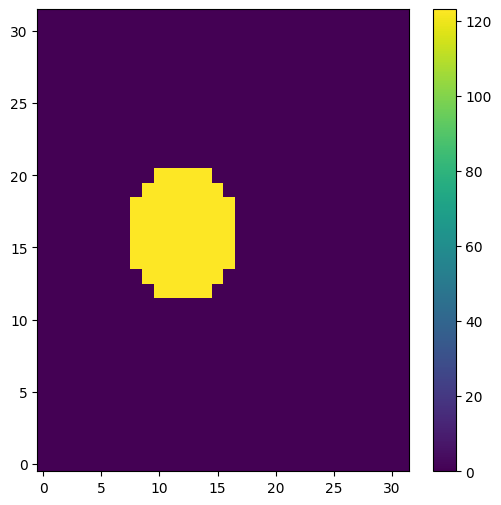

In [12]:
import numpy as np
import matplotlib.pyplot as plt

x = np.arange(0, 32)
y = np.arange(0, 32)
arr = np.zeros((y.size, x.size))

cx = 12.
cy = 16.
r = 5.

# The two lines below could be merged, but I stored the mask
# for code clarity.
mask = (x[np.newaxis,:]-cx)**2 + (y[:,np.newaxis]-cy)**2 < r**2
arr[mask] = 123.

# This plot shows that only within the circle the value is set to 123.
plt.figure(figsize=(6, 6))
plt.pcolormesh(x, y, arr)
plt.colorbar()
plt.show()

In [48]:
center = [1,1,1,1,1]
point = [1.3,1.3,1.3,1.3,1.3]
radius = [0.3,0.3,0.3,0.3,0.3]

In [42]:
np.sum(np.divide(np.power(np.subtract(center, point), 2), np.power(radius, 2)))

4.737777777777779

In [41]:
np.divide(np.power(np.subtract(center, point), 2), np.power(radius, 2))

array([0.93444444, 0.93444444, 0.93444444, 1.        , 0.93444444])

In [38]:
np.power(np.subtract(center, point), 2)

array([0.04, 0.04, 0.04, 0.09, 0.04])

In [49]:
w = np.array(radius)
q = np.array(center)-np.array(point)
np.sqrt((w*q*q).sum())

0.3674234614174768

In [58]:
def weightedL2(a, b, w):
    q = a-b
    return np.sqrt((w*q*q).sum())


def mathexchange(center, radius, point):
    res = np.sum(np.divide(np.power(np.subtract(center, point), 2), np.power(radius, 2)))
    return res

def mathexchange2(center, radius, point):
    # res = np.sum(np.power(np.divide(np.subtract(center, point), ), radius))
    res = np.sum(np.power(np.divide(np.subtract(center, point), radius), 2))
    return res

In [59]:
center = [1,1,1,1,1]
point = [1.3,1.3,1.3,1.3,1.3]
radius = [0.3,0.3,0.3,0.3,0.3]
print(mathexchange(center, radius, point))
print(mathexchange2(center, radius, point))

5.000000000000001
5.000000000000002


In [64]:
center = [1,1,1,1,1]
point = [1.0,1.0,1.0,1.1,1.2]
radius = [0.3,0.3,0.3,0.3,0.3]
print(mathexchange(center, radius, point))
print(mathexchange2(center, radius, point))

0.5555555555555556
0.5555555555555556


In [54]:
center = [1,1,1,1,1]
point = [1.1,1.1,1.1,1.1,1.1]
radius = [0.3,0.3,0.3,0.3,0.3]
w = np.array(radius)
q = np.array(center)-np.array(point)
np.sqrt((w*q*q).sum())

0.12247448713915901

# Ellipse

In [147]:
from helper.ellipse import main, mvee

0.9905231299861673


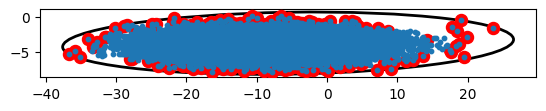

In [148]:
main()

In [155]:
mvee_res = mvee(np.array([list(item) for item in vectors.values()]))

In [153]:
np.array([list(item) for item in vectors.values()])

array([[-4.39408720e-01, -4.76612031e-01, -1.07024252e-01,
        -5.52680969e-01, -7.78992295e-01,  1.26077890e-01,
        -5.33726066e-02, -4.13829893e-01,  6.04093432e-01,
         6.44265890e-01,  2.79375583e-01,  6.91343248e-02,
         6.15748227e-01, -3.67497414e-01, -1.95363581e-01,
         4.67069268e-01, -7.36072838e-01,  1.20559886e-01,
        -2.42725268e-01,  7.88133264e-01,  2.63332516e-01,
        -1.67573005e-01, -1.51340663e-01,  1.03367245e+00,
        -3.65061671e-01, -2.20755324e-01,  1.41069904e-01,
         4.13478345e-01,  7.87278786e-02, -7.21242607e-01,
         4.80095476e-01, -3.51910144e-01,  2.17576191e-01,
         4.76656646e-01, -2.58828074e-01,  5.04848659e-02,
        -2.53914267e-01, -1.89191848e-01,  4.63653207e-02,
        -3.45236629e-01,  3.43636215e-01,  2.84615427e-01,
         1.16729401e-01, -3.73862058e-01,  4.56044346e-01,
         4.03221905e-01,  4.00978327e-01, -6.78828537e-01,
         5.29631861e-02,  7.14906976e-02,  1.00164139e+0

In [156]:
np.power(np.subtract(mvee_res[1], word2vec_model[seed[1]]), 2) / np.power(mvee_res[0], 2)

array([[2.21843491e-20, 1.41325964e-23, 4.86451094e-19, ...,
        2.78917052e-20, 3.66733797e-20, 7.98411841e-19],
       [2.18241299e-20, 8.70127351e-25, 2.94520165e-18, ...,
        7.10648437e-22, 6.15684351e-23, 7.76886304e-17],
       [3.91599678e-17, 2.07597844e-23, 3.02395089e-19, ...,
        2.80230904e-20, 1.17759854e-21, 3.43787717e-15],
       ...,
       [1.89823555e-19, 1.02440598e-18, 3.50651094e-18, ...,
        1.75494135e-19, 1.55978187e-20, 1.09943014e-16],
       [1.41120455e-20, 1.61052122e-22, 4.07832321e-18, ...,
        1.16693173e-20, 3.02087601e-22, 2.71739565e-18],
       [4.30915016e-19, 8.84003628e-22, 2.11342904e-17, ...,
        3.30178840e-19, 5.23418975e-20, 3.39813021e-17]])

In [159]:
mvee_res[0]

array([[ 6.12379748e+10, -1.98442405e+11, -1.13622814e+10, ...,
        -6.36937827e+10, -1.46901870e+10, -1.83856540e+10],
       [-6.17412895e+10,  7.99749631e+11,  4.61772023e+09, ...,
         3.99031492e+11,  3.58528540e+11, -1.86386234e+09],
       [ 1.45754846e+09, -1.63732178e+11,  1.44111211e+10, ...,
        -6.35442943e+10,  8.19792915e+10, -2.80186618e+08],
       ...,
       [-2.09348143e+10,  7.37071140e+08, -4.23201829e+09, ...,
         2.53923720e+10, -2.25253141e+10,  1.56678263e+09],
       [-7.67801896e+10, -5.87844194e+10, -3.92413838e+09, ...,
         9.84717941e+10,  1.61858809e+11,  9.96589092e+09],
       [-1.38946737e+10,  2.50910268e+10,  1.72381756e+09, ...,
         1.85122820e+10,  1.22964022e+10,  2.81820486e+09]])

In [29]:
from algorithm.kgvec2go_vectors_simple import run_method, load_gensim_model
from excludes.basic_excludes import (node_excl_yago_func, node_excl_extra,
                                     node_excl_owlthing_func, node_excl_wiki_func)
from loaders.loaders import *
from evaluation.split_dataset import split_on_seed_dataset
import json
import pickle
import os
from tqdm import tqdm


exclude_paths = [
    ["", "http://www.w3.org/1999/02/22-rdf-syntax-ns#type", "http://www.w3.org/2004/02/skos/core#Concept"]
]
relation_excludes = ["http://xmlns.com/foaf/0.1/primaryTopic",
                     "http://dbpedia.org/property/isCitedBy",
                     "http://dbpedia.org/ontology/wikiPageWikiLink",
                     "http://dbpedia.org/ontology/wikiPageWikiLinkText",
                     "http://dbpedia.org/property/wikiPageUsesTemplate",
                     'http://dbpedia.org/ontology/wikiPageRedirects',
                     'http://dbpedia.org/ontology/wikiPageOutDegree',
                     "http://dbpedia.org/ontology/abstract",
                     "http://www.w3.org/2000/01/rdf-schema#comment", ]

res_excludes_inside_point_relation = ["http://purl.org/linguistics/gold/hypernym",
                                      "http://www.w3.org/1999/02/22-rdf-syntax-ns#type"]
res_excludes_inside_point_node = []
node_excludes_funcs = [node_excl_wiki_func, node_excl_owlthing_func, node_excl_yago_func, node_excl_extra]

SEED = 44
SAMPLE_SIZE = 4
verbose = 1

#Dataset load
#lc_quad_train = load_lc_quad_train()

lc_quad_train = load_on_path(ds_lc_quad_train_cleaned)
splitted_lcquad = split_on_seed_dataset(lc_quad_train, SAMPLE_SIZE, SEED)

#splitted_lcquad = load_on_path_pickle("/home/kardosp/continuethelist/outputs/graphwalk_v2_output_sample4.pickle")

cwd = "/home/kardosp/continuethelist/dbpedia_vectors/kgvec2go"
word2vec_path = os.path.join(cwd, 'model.kv')
wv_model = load_gensim_model(word2vec_path)
missing_counter = 0


In [30]:
from gensim.models import Word2Vec, KeyedVectors
from gensim import models
import numpy as np
from scipy.spatial.distance import cdist
from sklearn.neighbors import RadiusNeighborsClassifier
from copy import copy


def load_gensim_model(path):
    w2v_model = models.KeyedVectors.load(
        path, mmap="r"
    )
    return w2v_model


def ellipse_rectangle_dist(center, radius, point, eps=1e-4):
    res = np.max(np.power(np.divide(np.subtract(center, point), radius), 2))
    # res = np.sum(np.power(np.divide(np.subtract(center, point), radius), 2))
    return res


def get_radius(center, seed):
    return np.max(np.abs(np.array(seed) - np.array(center)), axis=0)


In [ ]:
record = splitted_lcquad[0]
seed = record["seed"]
vectors = dict()
missing = 0
for item in seed:
    try:
        vectors[item] = list(wv_model[item])
    except Exception as e:
        missing += 1
if missing == len(seed):
    print("Sztoj")
center_vector = np.mean(list(vectors.values()), axis=0)
closer_elements = list()

radius = get_radius(center_vector, list(vectors.values()))
all_l1ellipse_dist = cdist([center_vector], wv_model.vectors, metric=lambda x, y: ellipse_rectangle_dist(x, radius, y))
all_l1ellipse_dist_1d = all_l1ellipse_dist[0]
sorted_distances = all_l1ellipse_dist_1d.argsort()

for index in sorted_distances.argsort():
    if all_l1ellipse_dist_1d[index] <= 1.0:
        closer_elements.append((index, all_l1ellipse_dist_1d[index]))
    else:
        break
prediction = [wv_model.index_to_key[item[0]] for item in closer_elements]

# distance_result = cdist([center_vector], [wv_model.vectors], metric=lambda x, y: is_inside_ellipse(x, radius, y))

In [ ]:
ellipse_rectangle_dist(center_vector, radius, list(vectors.values())[0])

In [ ]:
from copy import copy
all_l1ellipse_dist_1d_sorted = copy(all_l1ellipse_dist_1d)
all_l1ellipse_dist_1d_sorted.sort()
all_l1ellipse_dist_1d_sorted

In [ ]:
all_l1ellipse_dist_1d.sort()
all_l1ellipse_dist_1d

In [ ]:
all_l1ellipse_dist_1d.argsort()

In [ ]:
all_l1ellipse_dist_1d.argsort()[::-1]

In [ ]:
all_l1ellipse_dist_1d[1016]

In [ ]:
all_l1ellipse_dist_1d[118310]

In [ ]:
all_l1ellipse_dist_1d = all_l1ellipse_dist[0]
sorted_distances = all_l1ellipse_dist_1d.argsort()

for index in sorted_distances:
    print(index, all_l1ellipse_dist_1d[index])
    if all_l1ellipse_dist_1d[index] <= 1.0:
        closer_elements.append((index, all_l1ellipse_dist_1d[index]))
    else:
        break
prediction = [wv_model.index_to_key[item[0]] for item in closer_elements]

In [ ]:
prediction

In [ ]:
record

In [49]:
all_l1ellipse_dist_1d[1016]

1.0

In [50]:
all_l1ellipse_dist_1d[118310]

1330.4549560546875

In [56]:
all_l1ellipse_dist_1d = all_l1ellipse_dist[0]
sorted_distances = all_l1ellipse_dist_1d.argsort()

for index in sorted_distances:
    print(index, all_l1ellipse_dist_1d[index])
    if all_l1ellipse_dist_1d[index] <= 1.0:
        closer_elements.append((index, all_l1ellipse_dist_1d[index]))
    else:
        break
prediction = [wv_model.index_to_key[item[0]] for item in closer_elements]

1016 1.0
1803 1.0
76324 1.0
2129 1.0
3574303 4.064646244049072


In [57]:
prediction

['http://dbpedia.org/resource/San_Francisco',
 'http://dbpedia.org/resource/Seattle',
 'http://dbpedia.org/resource/Westminster,_Colorado',
 'http://dbpedia.org/resource/Tamil_Nadu']

In [58]:
record

{'_id': '2413',
 'corrected_question': 'Starwood operates in which places?',
 'intermediary_question': 'What is the <address> of the <hotels> whose <operator> is <Starwood Hotels and Resorts Worldwide>?',
 'sparql_query': 'SELECT DISTINCT ?uri WHERE { ?x <http://dbpedia.org/property/operator> <http://dbpedia.org/resource/Starwood_Hotels_and_Resorts_Worldwide> . ?x <http://dbpedia.org/property/address> ?uri  . }',
 'sparql_template_id': 5,
 'result': ['181',
  'http://dbpedia.org/resource/California',
  'http://dbpedia.org/resource/San_Francisco',
  '2',
  'Calle San Fernando, 2',
  '1',
  'http://dbpedia.org/resource/Chennai',
  'http://dbpedia.org/resource/Tamil_Nadu',
  'Krakowskie Przedmiescie 42/44',
  '1900',
  'http://dbpedia.org/resource/Seattle',
  '811',
  '333',
  '210',
  'http://dbpedia.org/resource/Atlanta',
  '10600',
  'http://dbpedia.org/resource/Westminster,_Colorado',
  'Main Gulshan Avenue, Plot-01, Road 45, Gulshan-2, Dhaka 1212, Bangladesh',
  '211',
  'http://dbpe